# BANK CHURN PREDICTOR MODEL (TASK 1) TT




# IMPORTING LIBRARIES 

In [1]:
import pandas as pd # for data  
import numpy as np # for statistics 
import seaborn as sns # for visualization 
import matplotlib.pyplot as plt 


# IMPORTING DATA BY USING PANDAS 
 1. creating a data frame named as df 


In [2]:
df = pd.read_csv('Churn_Modelling.csv') 

# finding whats in our data set


In [3]:

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#finding missing values 

In [6]:
 df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# lets figure out features and remove irrelevant features


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# 'RowNumber', 'CustomerId', 'Surname' are not usefull rightnow so we will drop it now 


In [8]:
#df1=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [9]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#since we have variables so for that we will encode them as 0,1,2 as per requirements 

In [11]:
#df2=pd.get_dummies(df1,drop_first=True)

In [12]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
'''as we can see our variables are coverted into numericals in geography as well as gender columns , just to clarify dummies  variable trap we removed first column'''

'as we can see our variables are coverted into numericals in geography as well as gender columns , just to clarify dummies  variable trap we removed first column'

In [14]:
#plotting the dependent feature 

In [15]:
 df2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

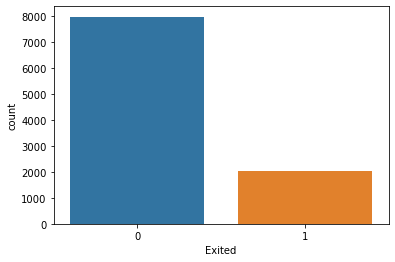

In [16]:
sns.countplot(df2['Exited'])

In [17]:
#as we can see there is imbalace in our data['exited'] since we use SMOTE to handle this imbalance


In [18]:
X=df2.drop('Exited',axis=1)
y=df2['Exited']

In [19]:
#spliting dataset into training set and testing set

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
#feature scaling our data set as our data requires it for ml algorithms 

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [23]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
#applying logistic regression 

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log=LogisticRegression()

In [27]:
log.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1=log.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred1)

0.808

In [31]:
from sklearn.metrics import f1_score,recall_score,precision_score


In [32]:
precision_score(y_test,y_pred1)

0.5891472868217055

In [33]:
recall_score(y_test,y_pred1)

0.18673218673218672

In [34]:
f1_score(y_test,y_pred1)

0.2835820895522388

In [35]:
#as we can see our results are not satisfying though we will make  feature scaling 

In [36]:

from imblearn.over_sampling import SMOTE

In [37]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [38]:
# lets check our smote by - y_res.value_counts()

In [39]:
#lets do lr again 
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
log.fit(X_train,y_train)
y_pred1=log.predict(X_test)


In [40]:
accuracy_score(y_test,y_pred1)


0.7875078468298807

In [41]:
precision_score(y_test,y_pred1)


0.7744360902255639

In [42]:
recall_score(y_test,y_pred1)


0.7958789439793947

In [43]:
f1_score(y_test,y_pred1)

0.7850111146395681

In [44]:
#as we can figure it out how much change we got after scaling 


In [45]:
# now doing svm


In [46]:
from sklearn import svm

In [47]:
svm=svm.SVC()

In [48]:
svm.fit(X_train,y_train)

SVC()

In [49]:
y_pred2=svm.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred2)

0.8436911487758946

In [51]:
precision_score(y_test,y_pred2)

0.832807570977918

In [52]:
# now checking out kniegbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier()

In [55]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
y_pred3=knn.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred3)

0.8107344632768362

In [58]:
precision_score(y_test,y_pred3)

0.7928483353884094

In [59]:
# checking desicion tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()

In [62]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred4=dt.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred4)

0.7934714375392341

In [65]:
precision_score(y_test,y_pred4)

0.7723676202069385

In [66]:
 from sklearn.ensemble import RandomForestClassifier

In [67]:
rf= RandomForestClassifier()

In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_pred5=rf.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred5)

0.8575015693659761

In [71]:
precision_score(y_test,y_pred5)

0.8515674984005118

In [72]:
# gradient boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc=GradientBoostingClassifier()

In [75]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [76]:
y_pred6=gbc.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred6)

0.8427495291902072

In [78]:
precision_score(y_test,y_pred6)

0.8367477592829705

In [79]:
final_data=pd.DataFrame({'models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [80]:
final_data

,models,ACC
0,LR,0.787508
1,SVC,0.843691
2,KNN,0.810734
3,DT,0.793471
4,RF,0.857502
5,GBC,0.842750


In [81]:
import seaborn as sns

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='models', ylabel='ACC'>

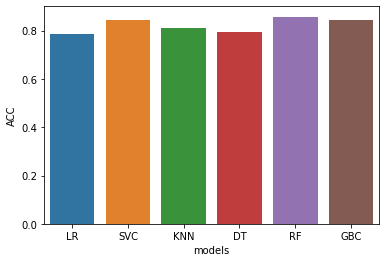

In [82]:
sns.barplot(final_data['models'],final_data['ACC'])

In [83]:
#SAME FOR PRECISION 

In [84]:
final_data=pd.DataFrame({'models':['LR','SVC','KNN','DT','RF','GBC'],'pre':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5),precision_score(y_test,y_pred6)]})

In [85]:
final_data


,models,pre
0,LR,0.774436
1,SVC,0.832808
2,KNN,0.792848
3,DT,0.772368
4,RF,0.851567
5,GBC,0.836748


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='models', ylabel='pre'>

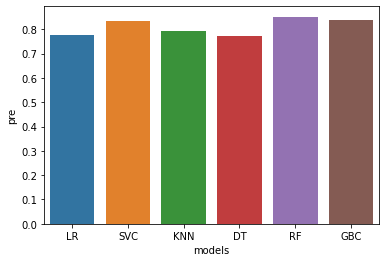

In [86]:
sns.barplot(final_data['models'],final_data['pre'])

In [87]:
#AS WE FIGURED OUT RANDOM FOREST WAS BEST AMONG ALL SO GOING WITH RF AND SAVING OUR MODEL 

In [88]:
X_res=sc.fit_transform(X_res)

In [89]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [90]:
import joblib

In [91]:
joblib.dump(rf,'bank_churn_model')

['bank_churn_model']

In [92]:
model = joblib.load('bank_churn_model')

In [93]:
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [94]:
model.predict([[250,42,2,0.0,0,0,0,101265.33,0,0,0]])

array([0], dtype=int64)

In [95]:
#making a gui 

In [96]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib
import tkinter as tk
from tkinter import ttk

In [ ]:
import joblib
import tkinter as tk
from tkinter import ttk
from sklearn.preprocessing import StandardScaler

# Create the main application window
master = tk.Tk()
master.title("Bank Churn Prediction")

# Feature names
feature_names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
                'Geography_Spain', 'Gender_Male']

# Dictionary to store the feature name and its corresponding Entry widget
entry_widgets = {}

# Load the trained RandomForestClassifier model and StandardScaler
model = joblib.load('bank_churn_model')
scaler = sc

# Function to preprocess the input data and make a prediction
def show_fields():
    input_data = []
    for feature in feature_names:
        value = int(entry_widgets[feature].get())
        input_data.append(value)
    
    # Scale the input_data using the loaded StandardScaler
    scaled_input = scaler.transform([input_data])
    
    result = model.predict(scaled_input)
    
    # Display the prediction result
    prediction_label.config(text=f"Prediction: {'Exited' if result[0] == 1 else 'Not Exited'}")

# Grid placement for the input fields
for i, feature in enumerate(feature_names):
    ttk.Label(master, text=feature).grid(row=i, column=0)
    entry_widgets[feature] = ttk.Entry(master)
    entry_widgets[feature].grid(row=i, column=1)

# Prediction Result Label
prediction_label = ttk.Label(master, text="")
prediction_label.grid(row=len(feature_names) + 1, column=0, columnspan=2)

# Assuming you have defined the 'button' and 'mainloop' functions
button = ttk.Button(master, text='Predict', command=show_fields)
button.grid(row=len(feature_names), column=1)

master.mainloop()

